## Downloading required libraries

In [163]:
import pandas as pd
import numpy as np
import os

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import shutil
import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')
import urllib.request
import requests

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [165]:
# Downloading and unzipping file from google drive location
# This may take a few minutes
from google_drive_downloader import GoogleDriveDownloader as gdd

url = 'https://drive.google.com/file/d/1fpX35jgPApMaXia-vm1G1XdoBQBHFzuf'
file_id = url.split('/')[-1]

gdd.download_file_from_google_drive(file_id=file_id,
                                    dest_path='./data/bank-full.csv',
                                    unzip=True)

In [166]:
#Loading data
dataframe = pd.read_csv("./data/bank-full.csv", delimiter=';')
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [167]:
#Model info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [168]:
# checking categorical data
for col in dataframe.columns:
    print()
    if dataframe[col].dtype =='object':
        print(f'Name of column is:{col} and unique values are:{dataframe[col].unique()}')



Name of column is:job and unique values are:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Name of column is:marital and unique values are:['married' 'single' 'divorced']

Name of column is:education and unique values are:['tertiary' 'secondary' 'unknown' 'primary']

Name of column is:default and unique values are:['no' 'yes']


Name of column is:housing and unique values are:['yes' 'no']

Name of column is:loan and unique values are:['no' 'yes']

Name of column is:contact and unique values are:['unknown' 'cellular' 'telephone']


Name of column is:month and unique values are:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']





Name of column is:poutcome and unique values are:['unknown' 'failure' 'other' 'success']

Name of column is:y and unique values are:['no' 'yes']


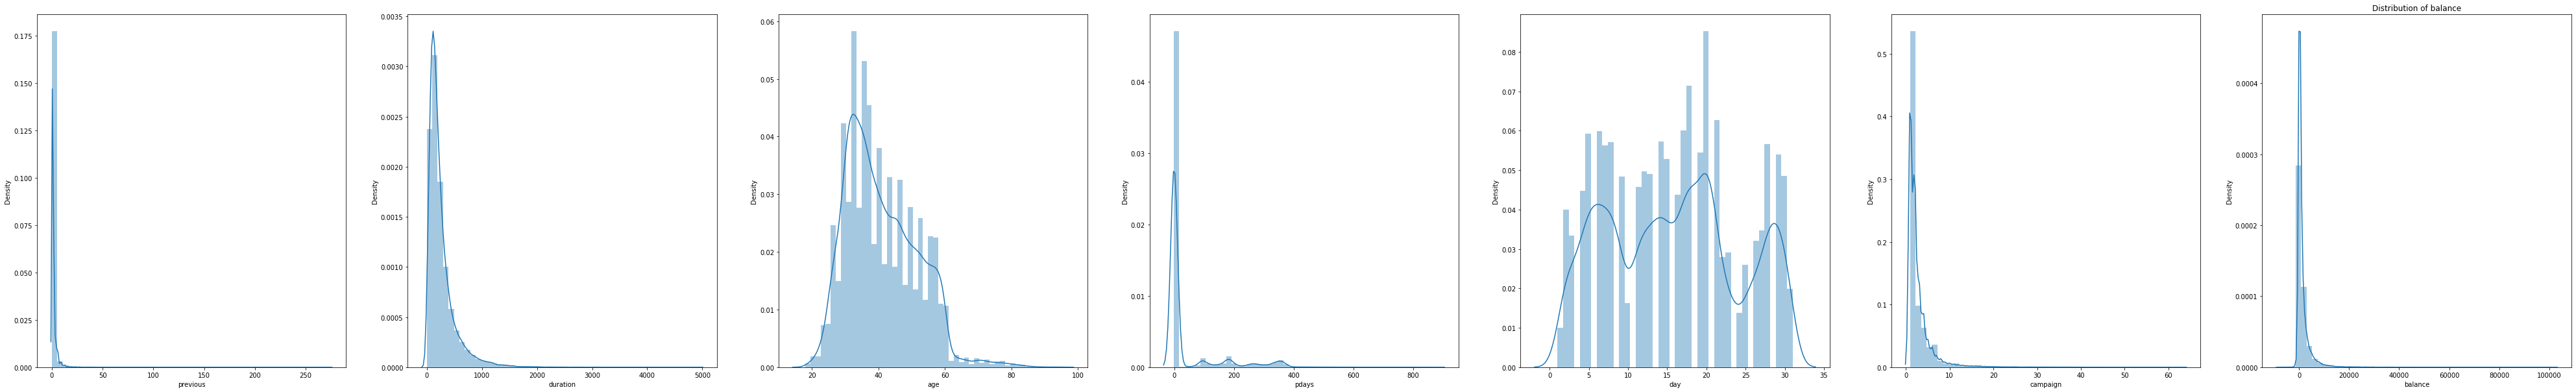

In [169]:
#checking distribution of numerical data
def return_categorical(dataframe):
    categorical_columns = [column_name for column_name in dataframe if dataframe[column_name].dtype == 'O']
    return categorical_columns

def return_numerical(dataframe):
    return list(set(dataframe.columns) - set(return_categorical(dataframe)))

def check_normal(dataframe):
    fig, axes = plt.subplots(1,len(return_numerical(dataframe)), figsize =(70, 10))
    for i,numeric_column_name in enumerate(list(set(dataframe.columns) -set(return_categorical(dataframe)))):
        sns.distplot(dataframe[numeric_column_name], ax=axes[i]);
        plt.title(f'Distribution of {numeric_column_name}');

check_normal(dataframe)

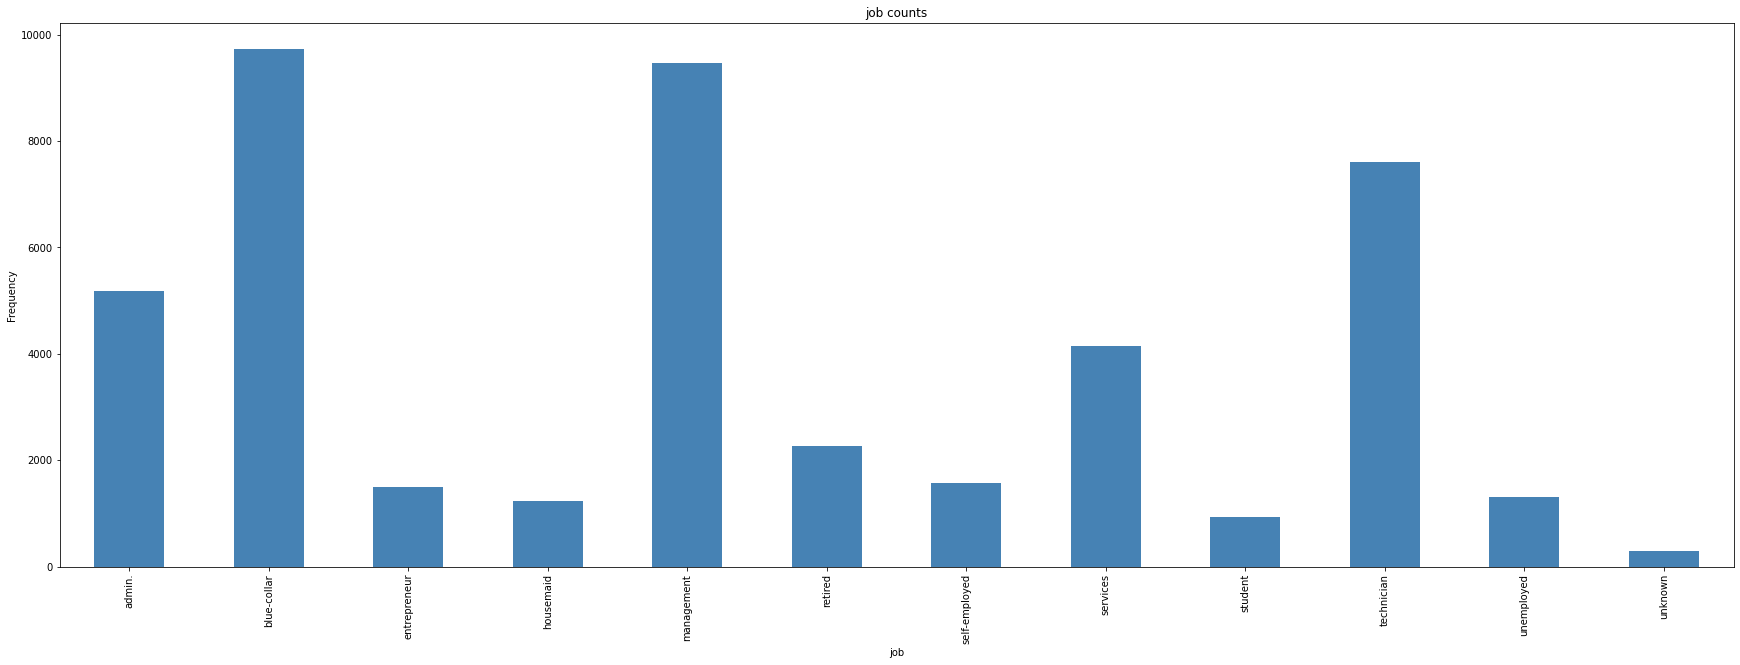

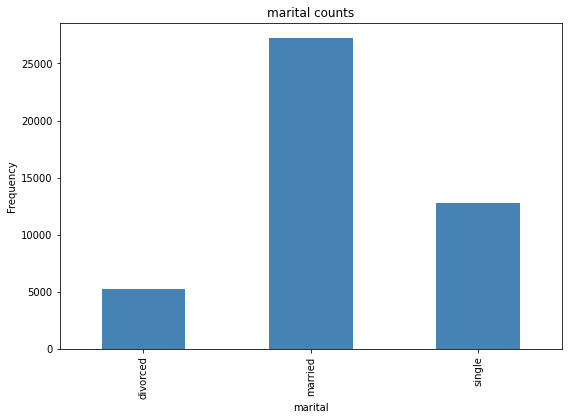

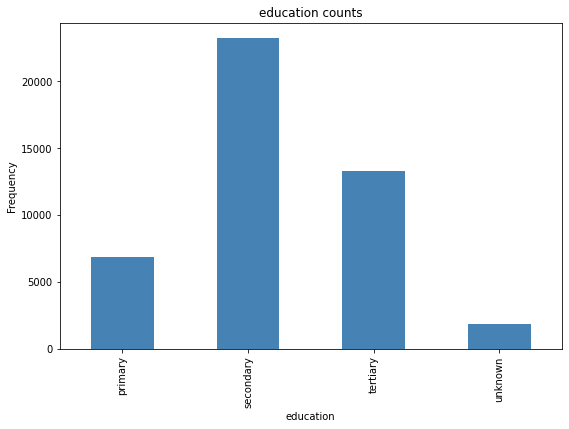

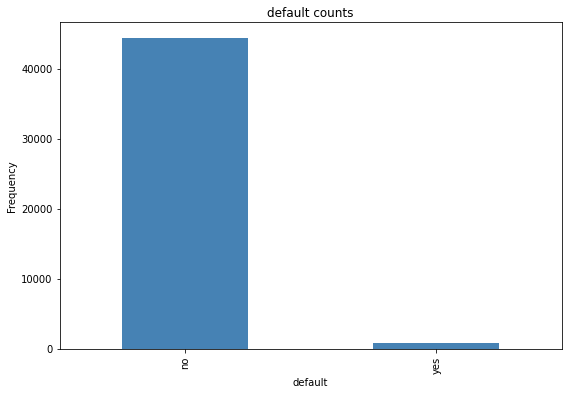

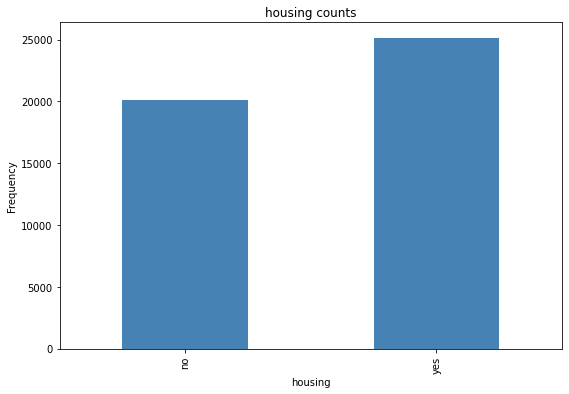

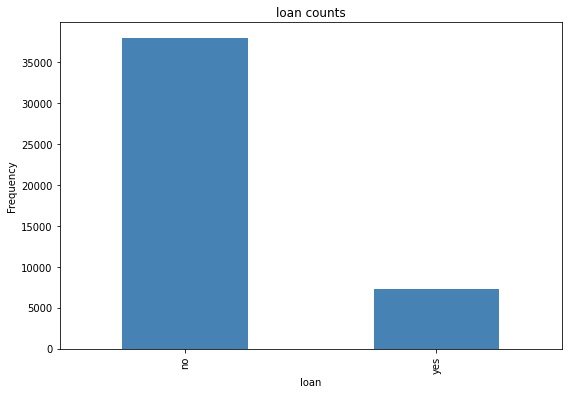

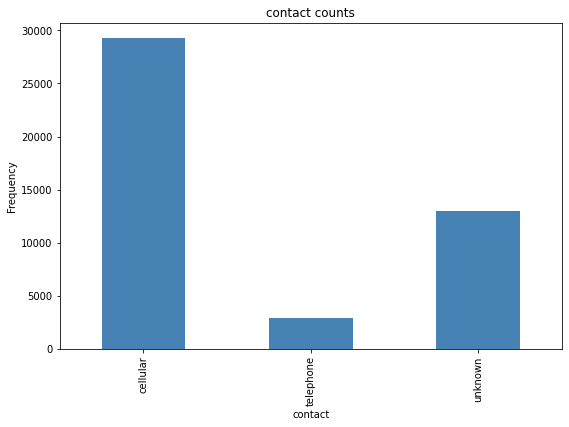

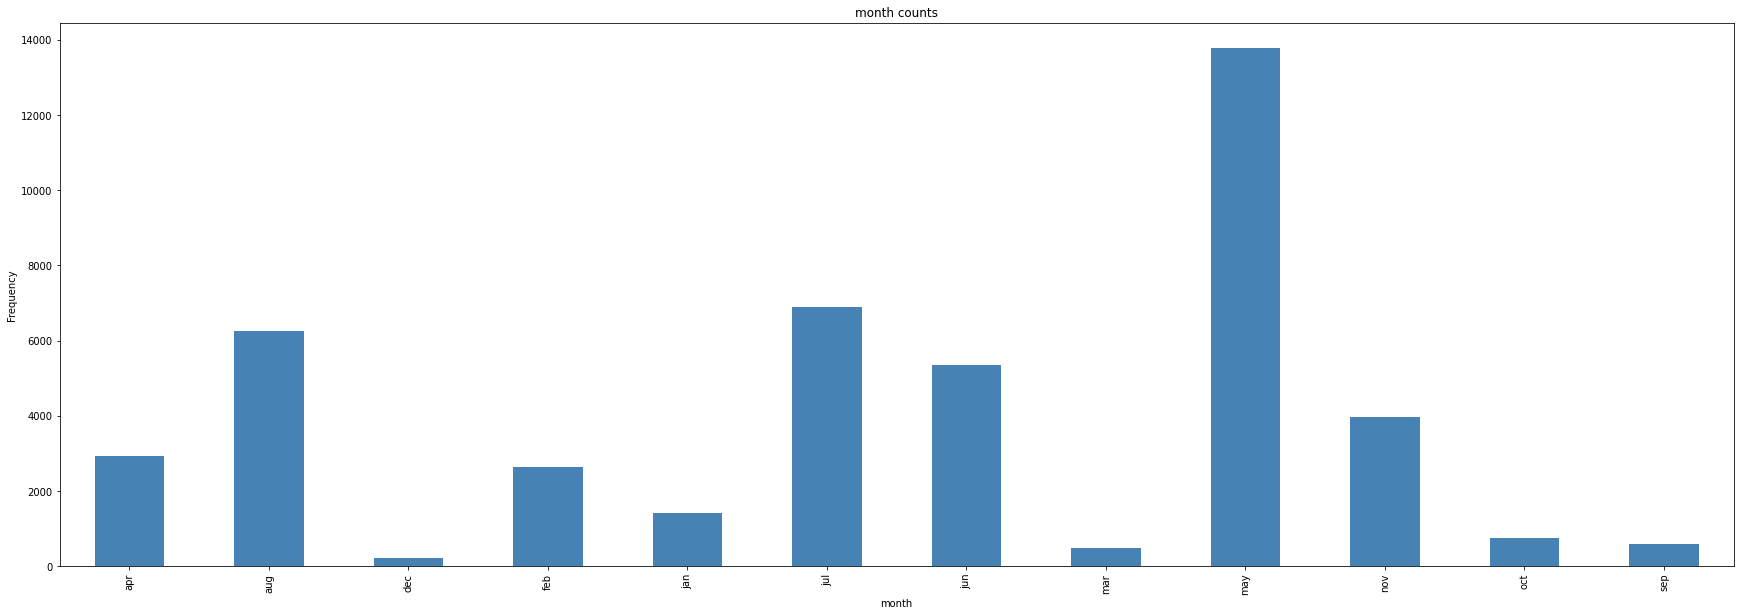

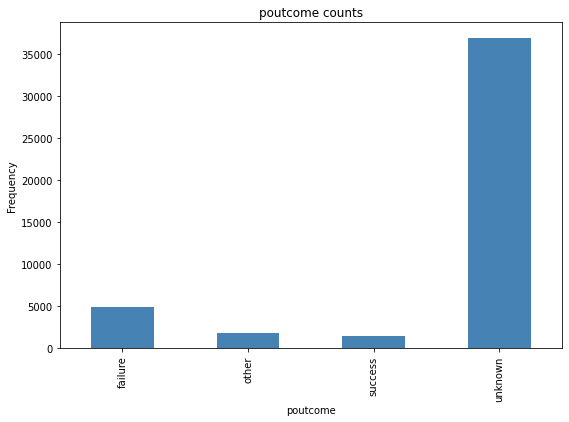

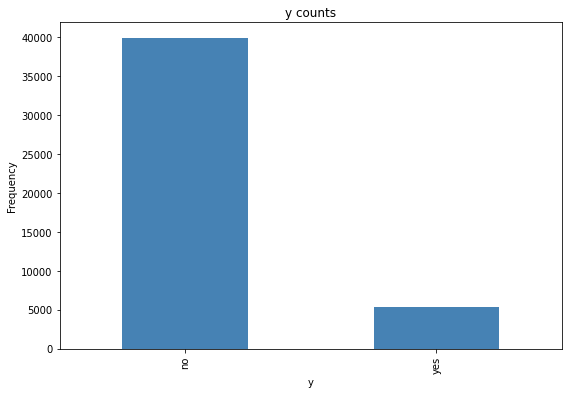

In [170]:
# Ploting categorical variables
for col in return_categorical(dataframe):
    counts = dataframe[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

#### This has highlighted class imbalance for target variable

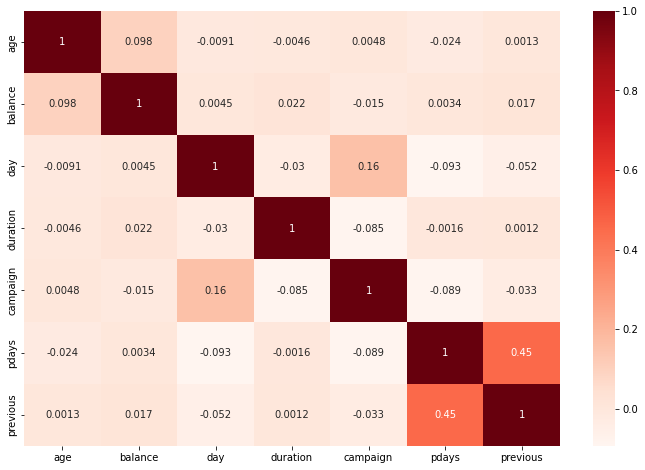

In [171]:
# checking correlation

corr = dataframe.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Reds", annot = True);

#### As you can see from the chart above there is no significant correlation between numerical variables

In [181]:
	"""'campaign': 1,
	'pdays': -1,
	'previous': 0,
	'poutcome': 3"""
 
dataframe['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [179]:
col_toOneHot = [x for x in categorical_column if x not in col_toEncode]
col_toOneHot

['education', 'default', 'housing', 'loan', 'contact']

In [146]:
# Checking the NA in the dataframe
#dataframe.isna().sum()


def encode_data(df):
    col_toEncode = ['job', 'marital', 'month', 'poutcome', 'y']
    col_toOneHot = ['education', 'default', 'housing', 'loan', 'contact']
    
    def label_encoder(df):
        le = LabelEncoder()
        labelenconded = le.fit(df)
        df = labelenconded.transform(df)
        return df
    
    for i in col_toEncode:
        df[i] = label_encoder(df[i])
    df = pd.get_dummies(data = df, columns=col_toOneHot, drop_first = False)
    df = df.sort_index(axis=1)
    return df


In [126]:
dataframe_x = encode_data(dataframe)
dataframe_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   campaign             45211 non-null  int64
 3   contact_cellular     45211 non-null  uint8
 4   contact_telephone    45211 non-null  uint8
 5   contact_unknown      45211 non-null  uint8
 6   day                  45211 non-null  int64
 7   default_no           45211 non-null  uint8
 8   default_yes          45211 non-null  uint8
 9   duration             45211 non-null  int64
 10  education_primary    45211 non-null  uint8
 11  education_secondary  45211 non-null  uint8
 12  education_tertiary   45211 non-null  uint8
 13  education_unknown    45211 non-null  uint8
 14  housing_no           45211 non-null  uint8
 15  housing_yes          45211 non-null  uint8
 16  job                  4

##### Modifying the categorical columns and assigning weights based on importance

In [69]:
y_actual = dataframe_x['y']
dataframe_x = dataframe_x.drop("y", axis=1)
features = list(dataframe_x.columns)

scaler = StandardScaler()
x = scaler.fit_transform(dataframe_x)
joblib.dump(scaler, 'std_scaler.pkl')

['std_scaler.pkl']

In [74]:
# Train - Test Split

seed = 0
x = pd.DataFrame(x, columns = features)
x_train,x_test,y_train,y_test = train_test_split(x, y_actual, random_state=seed, test_size = 0.2)
joblib.dump(x_train.columns, "columns.pkl")

['columns.pkl']

In [82]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specifically(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

def print_report (y_actual, y_pred, threshold = 0.5):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > threshold))
    recall = recall_score(y_actual, (y_pred > threshold))
    precision = precision_score(y_actual, (y_pred > threshold))
    specificity = calc_specifically(y_actual, y_pred, threshold)
    f1 = 2* (precision * recall) / (precision + recall)

    print('AUC: %.3f' %auc)
    print('accuracy: %.3f'%accuracy)
    print('Recall: %.3f'%recall)
    print('Precision: %.3f'%precision)
    print('Specificity: %.3f'%specificity)
    print('f1: %.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1


In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(36168, 24)
(36168,)
(9043, 24)
(9043,)


### Applying to Gradient Boosting classifier - Parameter Search using Grid Search

In [76]:
from sklearn.model_selection import RandomizedSearchCV
import time

from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

# number of trees
n_estimators = range(50,200,50)

# maximum number of the tree
max_depth = range(1,5,1)

#learning_rate
learning_rate = [0.001, 0.01, 0.1, 1, 1.5, 5]

# Gradient boosting benchmark
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=seed)

gbc.fit(x_train, y_train)

# Gradient boosting with Randomized Search cv

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

gbc_random = RandomizedSearchCV(estimator = gbc,
                                param_distributions = random_grid_gbc,
                                n_iter = 20,
                                cv = 2,
                                scoring=auc_scoring,
                                verbose = 0,
                                random_state = seed)

t1 = time.time()
gbc_random.fit(x_train, y_train)
t2 = time.time()
print(t2-t1)

print(gbc_random.best_params_)

298.79054284095764
{'n_estimators': 150, 'max_depth': 4, 'learning_rate': 1.5}


In [77]:
# Identifying best parameters to use in model
params = gbc_random.best_params_
params

{'n_estimators': 150, 'max_depth': 4, 'learning_rate': 1.5}

In [78]:
# Comparision between the benchmark and the best params
y_train_pred = gbc.predict_proba(x_train)[:,1]
thresh = 0.5
print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_pred)
print('Training AUC:%.3f'%(gbc_train_base_auc))


print('Optimized gbc')
y_train_pred_random = gbc_random.best_estimator_.predict_proba(x_train)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_pred_random)
print('Training AUC:%.3f'%(gbc_train_opt_auc))


Baseline gbc
Training AUC:0.952
Optimized gbc
Training AUC:0.877


In [79]:
# Saving models with the best parameters 

best_model = GradientBoostingClassifier(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'], random_state=seed)
best_model.fit(x_train, y_train)

# converting best model to pkl for future
pickle.dump(best_model, open('best_classifier.pkl','wb'), protocol=4)

#Joblib conversion
import joblib
joblib.dump(best_model, 'best_classifier.joblib')

['best_classifier.joblib']

In [86]:
y_train_pred = best_model.predict_proba(x_train)[:,1]
print(y_train_pred.shape)
y_test_pred = best_model.predict_proba(x_test)[:,1]
print(y_test_pred.shape)

(36168,)
(9043,)


In [84]:
# Identifying various parameters across benchmark and ideal model

thresh = 0.5
print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_pred, thresh)
print('Test:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_test,y_test_pred, thresh)

Training:
AUC: 0.877
accuracy: 0.889
Recall: 0.641
Precision: 0.521
Specificity: 0.922
f1: 0.575
 
Test:
AUC: 0.851
accuracy: 0.875
Recall: 0.607
Precision: 0.474
Specificity: 0.910
f1: 0.532
 


#### Unpickle and predict

In [87]:
clf = joblib.load(open('best_classifier.joblib', 'rb'))
cols_input = pickle.load(open('columns.pkl', 'rb'))
scaler = pickle.load(open('std_scaler.pkl', 'rb'))

In [183]:
form_data = {'age': 52, 'job': 1, 'marital': 1, 'education': 'secondary','default': 'no', 'balance': 633,'housing': 'yes','loan': 'no','contact': 'cellular','day': 14,'month': 8,'duration': 292,'campaign': 1,'pdays': -1,'previous': 0,'poutcome': 3}
df_input = pd.DataFrame.from_records([form_data],)
df_input = pd.DataFrame(df_input)
print(df_input.shape)
sample_df = pd.DataFrame(columns = cols_input)
clean_df = encode_data(df_input)
main_df = sample_df.append(clean_df)
main_df = main_df.fillna(0)
print(main_df)

def standardize_data(dta):
    scaler = joblib.load("std_scaler.pkl")
    X_transformed = scaler.fit_transform(dta)
    return X_transformed


std_df = standardize_data(main_df)
print(std_df)

pred = clf.predict(std_df)
#print(pred, pred[0])
#z = round(pred[0][0]*100, 2)
    
print(pred)




(1, 16)
   age  balance  campaign  contact_cellular  contact_telephone  \
0   52      633         1                 1                  0   

   contact_unknown  day  default_no  default_yes  duration  ...  housing_no  \
0                0   14           1            0       292  ...           0   

   housing_yes  job  loan_no  loan_yes  marital  month  pdays  poutcome  \
0            1    0        1         0        0      0     -1         0   

   previous  
0         0  

[1 rows x 24 columns]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


In [90]:
actual_sample2 = dataframe.head(5)
actual_sample2 = encode_data(actual_sample2)
actual_sample2

,age,balance,campaign,contact_unknown,day,default_no,duration,education_secondary,education_tertiary,education_unknown,...,housing_yes,job,loan_no,loan_yes,marital,month,pdays,poutcome,previous,y
0,58,2143,1,1,5,1,261,0,1,0,...,1,2,1,0,0,0,-1,0,0,0
1,44,29,1,1,5,1,151,1,0,0,...,1,3,1,0,1,0,-1,0,0,0
2,33,2,1,1,5,1,76,1,0,0,...,1,1,0,1,0,0,-1,0,0,0
3,47,1506,1,1,5,1,92,0,0,1,...,1,0,1,0,0,0,-1,0,0,0
4,33,1,1,1,5,1,198,0,0,1,...,0,4,1,0,1,0,-1,0,0,0


In [91]:
adhoc_predict2 = actual_sample2.head()
adhoc_predict2

,age,balance,campaign,contact_unknown,day,default_no,duration,education_secondary,education_tertiary,education_unknown,...,housing_yes,job,loan_no,loan_yes,marital,month,pdays,poutcome,previous,y
0,58,2143,1,1,5,1,261,0,1,0,...,1,2,1,0,0,0,-1,0,0,0
1,44,29,1,1,5,1,151,1,0,0,...,1,3,1,0,1,0,-1,0,0,0
2,33,2,1,1,5,1,76,1,0,0,...,1,1,0,1,0,0,-1,0,0,0
3,47,1506,1,1,5,1,92,0,0,1,...,1,0,1,0,0,0,-1,0,0,0
4,33,1,1,1,5,1,198,0,0,1,...,0,4,1,0,1,0,-1,0,0,0


In [ ]:
scaler = StandardScaler().fit(adhoc_predict2)
scaled_adhoc_predict2 = scaler.transform(adhoc_predict2)
scaled_adhoc_predict2

In [ ]:
list(clf.predict(scaled_adhoc_predict2))

In [ ]:
#selecting dataframes adhoc basis
actual_sample = dataframe.sample()
adhoc_predict = actual_sample.drop("y", axis=1)
print(adhoc_predict)

In [ ]:
# creating json data

json_payload = adhoc_predict.to_json()
json_payload


In [ ]:
scaled_adhoc_predict = pd.DataFrame(StandardScaler().fit_transform(adhoc_predict), columns=actual_sample.columns)
scaled_adhoc_predict = scaled_adhoc_predict.head(4)
scaled_adhoc_predict

In [ ]:
dataframe.sample()
